## Exploratory Pt 2
This notebook is for an exploratory analysis of 3 additional data sources from invisible institute. Once I see how it's organized, how clean it is, I decide whether to add it. I expect to throw this data into model
- complaints-victims: to get breakdown of victims by race
- officer-filed-complaints__2017-09.csv.gz: to get count of cpd filed complaints (not exactly sure what this is)
- TRR-actions-responses_2004-2016_2016-09.csv.gz per data dictionary:
  - action: action taken by officer/member/subject
  - action_category: action level 0 (member presence) to 6 (firearm), only applicable for officer/member actions
  - action_sub_category: 'same as action_category, except some levels are broken into
    sublevels, i.e. physical holding (3.3) and taser displayed (3.1) are the same
    level, but different severity within the level '
  - force_type: description of member force (corresponds to action_sub_category, other
    and other force -> 2)
  - member_action: more specific description of force type
  - other_description: description of member action for other and other force member
    actions'
  - person: type of person commiting the action (member/officer or subject)
  - resistance_level: level of subject resistance, generated from member action
  - resistance_type: type of subject resistance (in original file)
  - trr_id: officer x event x subject specific id number, internally generated by CPD"

In [24]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
import os
sys.path.insert(0, os.path.abspath("../pipeline"))
import Make_By_Officer_DF as make_officer_df
import Feat_Engineering as feat_engineering_helpers
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
complaints_victims = pd.read_csv("../data/complaints-victims.csv.gz", compression = "gzip")
complaints_accused = pd.read_csv("../data/complaints-accused.csv.gz", compression="gzip")
complaints = pd.read_csv("../data/complaints-complaints.csv.gz", compression="gzip")
CPD_filed_complaints = pd.read_csv("../data/officer-filed-complaints__2017-09.csv.gz")
TRR_action_responses = pd.read_csv("../data/TRR-actions-responses_2004-2016_2016-09.csv.gz", compression = "gzip")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploratory on victim demographics

In [10]:
complaints_victims.head(5)

,age,birth_year,cr_id,cv,gender,race
0,24.0,NaN,1000551,2,MALE,BLACK
1,51.0,NaN,1000861,2,FEMALE,BLACK
2,NaN,NaN,1001509,2,MALE,WHITE
3,NaN,NaN,1001880,2,FEMALE,BLACK
4,NaN,NaN,1003246,2,MALE,HISPANIC


Match these to our relevant complaints

In [14]:
t1 = (2012, 2014)
t2 = (2015, 2015)
complaints_t1, complaints_t2 = feat_engineering_helpers.relevant_complaints(complaints, complaints_accused, t1, t2)
complaints_t1 = complaints_t1.merge(complaints_victims, how = "left", on = "cr_id")
complaints_t1.head(5)

,cr_id,incident_date,UID,complaint_category,complaint_code,cv_x,final_finding,final_outcome,recc_finding,recc_outcome,link_UID,age,birth_year,cv_y,gender,race
0,1051762,2012-02-07,102767.0,"IMPACT WEAPON - UNAUTHORIZED (FLASHLIGHT, HAND...",S011,3.0,SU,150 Day Suspension,NaN,NaN,26925.0,NaN,1997.0,3.0,MALE,BLACK
1,1051762,2012-02-07,102767.0,"IMPACT WEAPON - UNAUTHORIZED (FLASHLIGHT, HAND...",S011,3.0,SU,150 Day Suspension,NaN,NaN,26925.0,NaN,1997.0,3.0,MALE,BLACK
2,1051762,2012-02-07,132251.0,"IMPACT WEAPON - UNAUTHORIZED (FLASHLIGHT, HAND...",S011,3.0,SU,150 Day Suspension,NaN,NaN,32252.0,NaN,1997.0,3.0,MALE,BLACK
3,1051762,2012-02-07,132251.0,"IMPACT WEAPON - UNAUTHORIZED (FLASHLIGHT, HAND...",S011,3.0,SU,150 Day Suspension,NaN,NaN,32252.0,NaN,1997.0,3.0,MALE,BLACK
4,1051815,2012-01-02,113650.0,NaN,NaN,2.0,NaN,Unknown,NaN,Unknown,7261.0,NaN,NaN,NaN,NaN,NaN


In [16]:
complaints_t1.groupby("race").size()

race
ASIAN/PACIFIC ISLANDER              306
BLACK                             24256
HISPANIC                           4115
NATIVE AMERICAN/ALASKAN NATIVE       39
WHITE                              3911
dtype: int64

In [ ]:
feat_engineering_helpers.complaint_bins(complaints_t1)
complaint_bins_by_race = pd.DataFrame(complaints_t1.groupby(["race","complaints_binned"]).size().reset_index())
complaint_bins_by_race.rename(columns={0:"Count"}, inplace = True)

age                            birth_year                        \
race     BLACK HISPANIC WHITE ASIAN/PACIFIC ISLANDER        BLACK HISPANIC   
UID                                                                          
100007.0   NaN      NaN   NaN                    NaN  1976.666667      NaN   
100011.0   NaN      NaN   NaN                    NaN  1972.166667      NaN   
100012.0   NaN      NaN   NaN                    NaN  1980.000000      NaN   
100013.0   NaN      NaN   NaN                    NaN  1959.000000      NaN   
100014.0   NaN      NaN   NaN                    NaN  1978.000000      NaN   
...        ...      ...   ...                    ...          ...      ...   
132434.0   NaN      NaN   NaN                    NaN  1995.000000   1976.5   
132436.0   NaN      NaN   NaN                    NaN          NaN      NaN   
132438.0   NaN      NaN   NaN                    NaN  1995.000000      NaN   
132440.0   NaN      NaN   NaN                    NaN  1973.250000   1973.0   
132448.0   NaN      NaN   NaN                    NaN          NaN      NaN   

                                                                  cv_x        \
race     NATIVE AMERICAN/ALASKAN NATIVE   WHITE ASIAN/PACIFIC ISLANDER BLACK   
UID                                                                            
100007.0                            NaN     NaN                    NaN   2.0   
100011.0                            NaN     NaN                    NaN   2.0   
100012.0                            NaN     NaN                    NaN   2.0   
100013.0                            NaN  1958.0                    NaN   2.0   
100014.0                            NaN     NaN                    NaN   2.0   
...                                 ...     ...                    ...   ...   
132434.0                            NaN     NaN                    NaN   2.0   
132436.0                            NaN     NaN                    NaN   2.0   
132438.0                            NaN     NaN                    NaN   2.0   
132440.0                            NaN     NaN                    NaN   2.0   
132448.0                            NaN     NaN                    NaN   NaN   

          ...                   cv_y                 \
race      ... ASIAN/PACIFIC ISLANDER BLACK HISPANIC   
UID       ...                                         
100007.0  ...                    NaN   3.0      NaN   
100011.0  ...                    NaN   3.0      NaN   
100012.0  ...                    NaN   3.0      NaN   
100013.0  ...                    NaN   3.0      NaN   
100014.0  ...                    NaN   3.0      NaN   
...       ...                    ...   ...      ...   
132434.0  ...                    NaN   3.0      3.0   
132436.0  ...                    NaN   3.0      NaN   
132438.0  ...                    NaN   3.0      NaN   
132440.0  ...                    NaN   3.0      3.0   
132448.0  ...                    NaN   NaN      NaN   

                                                            link_UID           \
race     NATIVE AMERICAN/ALASKAN NATIVE WHITE ASIAN/PACIFIC ISLANDER    BLACK   
UID                                                                             
100007.0                            NaN   NaN                    NaN     56.0   
100011.0                            NaN   NaN                    NaN   3978.0   
100012.0                            NaN   NaN                    NaN   4423.0   
100013.0                            NaN   3.0                    NaN   4443.0   
100014.0                            NaN   NaN                    NaN   4879.0   
...                                 ...   ...                    ...      ...   
132434.0                            NaN   NaN                    NaN  32436.0   
132436.0                            NaN   NaN                    NaN  32438.0   
132438.0                            NaN   NaN                    NaN  32440.0   
132440.0                            NaN   NaN         

In [ ]:
sns.set(style="whitegrid")
sns.set(rc = {"figure.figsize":(25, 25)})

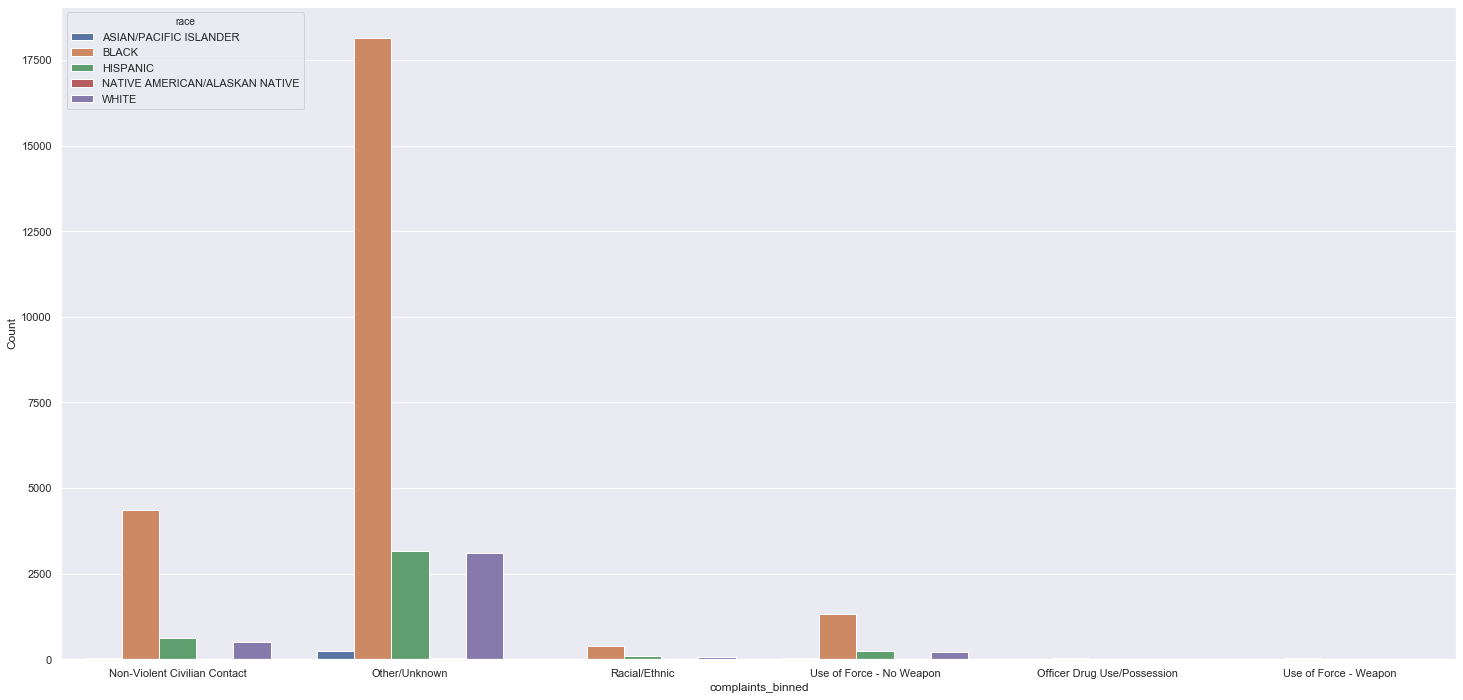

In [46]:
fig_dims = (25, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="complaints_binned", y = "Count" , data=complaint_bins_by_race, ax=ax, hue ="race")

In [104]:
by_officer_groupby = pd.DataFrame(complaints_t1.groupby(["UID", "race"]).size())

by_officer_racial_breakdown = pd.pivot_table(by_officer_groupby, values =0, index=['UID'],
                                             columns=['race'])
by_officer_racial_breakdown.fillna(0, inplace=True)

by_officer_racial_breakdown.div(by_officer_racial_breakdown.sum(axis = 1), axis=0)

by_officer_racial_breakdown.columns = ["PCNT Complaints Against " + x for x in by_officer_racial_breakdown.columns]

In [119]:
by_officer_racial_breakdown.columns

Index(['PCNT Complaints Against ASIAN/PACIFIC ISLANDER',
       'PCNT Complaints Against BLACK', 'PCNT Complaints Against HISPANIC',
       'PCNT Complaints Against NATIVE AMERICAN/ALASKAN NATIVE',
       'PCNT Complaints Against WHITE'],
      dtype='object')

In [149]:
pd.merge(complaints_t1["UID"], by_officer_racial_breakdown, how = "left", left_on ="UID", right_index = True )

/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py:394: DtypeWarning: Columns (4,15) have mixed types.Specify dtype option on import or set low_memory=False.
  module = reload(module)
/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py:394: DtypeWarning: Columns (3,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  module = reload(module)
/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py:394: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  module = reload(module)


,UID,PCNT Complaints Against ASIAN/PACIFIC ISLANDER,PCNT Complaints Against BLACK,PCNT Complaints Against HISPANIC,PCNT Complaints Against NATIVE AMERICAN/ALASKAN NATIVE,PCNT Complaints Against WHITE
0,102767.0,0.0,8.0,0.0,0.0,0.0
1,102767.0,0.0,8.0,0.0,0.0,0.0
2,132251.0,0.0,2.0,0.0,0.0,0.0
3,132251.0,0.0,2.0,0.0,0.0,0.0
4,113650.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
36752,121737.0,0.0,1.0,0.0,0.0,0.0
36753,124240.0,0.0,1.0,0.0,0.0,0.0
36754,NaN,NaN,NaN,NaN,NaN,NaN
36755,NaN,NaN,NaN,NaN,NaN,NaN


Put code into make_officer_df, see if it works

In [152]:
bin_names, final_df = make_officer_df.make_df(t1, t2)

/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py:394: DtypeWarning: Columns (4,15) have mixed types.Specify dtype option on import or set low_memory=False.
  module = reload(module)
/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py:394: DtypeWarning: Columns (3,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  module = reload(module)
/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py:394: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  module = reload(module)


In [153]:
final_df.isna().sum()

target_use_of_force                                         0
target_drug                                                 0
target_racial                                               0
target_sustained                                            0
target_nonviolent                                           0
target_other                                                0
suspension_length                                           0
settlement                                                  0
count_sustained                                             0
trr_total                                                   0
trr_firearms_total                                          0
trr_taser_total                                             0
Pcnt Complaints Against ASIAN/PACIFIC ISLANDER              0
Pcnt Complaints Against BLACK                               0
Pcnt Complaints Against HISPANIC                            0
Pcnt Complaints Against NATIVE AMERICAN/ALASKAN NATIVE      0
Pcnt Com

## Exploratory on CPD filed complaints

## TRR actions on CPD filed complaints